# Neural Network
In this project, I will create a small neural network in keras that classifies the different types of winee. They labels are the columns called "Class".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

In [ ]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2024-05-20 17:16:44--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-05-20 17:16:44 ERROR 404: Not Found.



#Import data

In [2]:
import pandas as pd
df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.shape

(178, 14)

In [4]:
X = df.drop(['Class'], axis=1).values
X.shape

(178, 13)

In [5]:
y = df['Class'].values
y.shape

(178,)

In [6]:
# Since the label starts from 1, we can adjust the classes to zero-based indexing
y = y - 1

# Split the data, standardize and perform one-hot encoding

In [7]:

# Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler to standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encoding to convert labels to categorical
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


# Build the neural network model

In [8]:
# Now, we can build the neural network model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

#Compile and fit the Model (using 16 batch_size and 250 epochs)

In [ ]:
batch_size = 16
epochs = 250


# Then compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
neural_mod = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


# **Print the history**

In [10]:

print(neural_mod.history)


{'loss': [1.1815036535263062, 1.004723310470581, 0.8629400730133057, 0.7400339841842651, 0.6367582082748413, 0.5381984114646912, 0.44045835733413696, 0.34728309512138367, 0.26176679134368896, 0.19241170585155487, 0.14111261069774628, 0.10575823485851288, 0.08155039697885513, 0.06502494215965271, 0.05259694159030914, 0.04459024593234062, 0.03735692426562309, 0.032473329454660416, 0.02804187312722206, 0.024462491273880005, 0.021210763603448868, 0.018054934218525887, 0.0156357754021883, 0.013628103770315647, 0.012246866710484028, 0.010688450187444687, 0.009873541072010994, 0.00872892141342163, 0.007912659086287022, 0.007164280395954847, 0.006638694554567337, 0.006048896815627813, 0.005631851032376289, 0.005209243856370449, 0.004882461857050657, 0.004500207956880331, 0.004173457156866789, 0.003922982607036829, 0.003681459929794073, 0.0034974562004208565, 0.003291561035439372, 0.0030426429584622383, 0.0028870776295661926, 0.0027314925100654364, 0.002587792929261923, 0.0024382960982620716, 0

# Calculate metrics

In [11]:
average_training_loss = np.mean(neural_mod.history['loss'])
average_validation_loss = np.mean(neural_mod.history['val_loss'])
average_training_accuracy = np.mean(neural_mod.history['accuracy'])
average_validation_accuracy = np.mean(neural_mod.history['val_accuracy'])

# metrics
print("Training Loss: ", average_training_loss)
print("Validation Loss: ", average_validation_loss)
print("Training Accuracy: ", average_training_accuracy)
print("Validation Accuracy: ", average_validation_accuracy)

Training Loss:  0.028305487327001173
Validation Loss:  0.023904388045019005
Training Accuracy:  0.9925633808374404
Validation Accuracy:  0.9942222222089767


# We can also extract the final epoch's metrics

In [ ]:
final_training_loss = neural_mod.history['loss'][-1]
final_training_accuracy = neural_mod.history['accuracy'][-1]
final_validation_loss = neural_mod.history['val_loss'][-1]
final_validation_accuracy = neural_mod.history['val_accuracy'][-1]

# final metrics
print(f"Training loss: {final_training_loss:.4f}")
print(f"Training accuracy: {final_training_accuracy:.2%}")
print(f"Validation loss: {final_validation_loss:.4f}")
print(f"Validation accuracy: {final_validation_accuracy:.2%}")

# Finally, let's plot the history

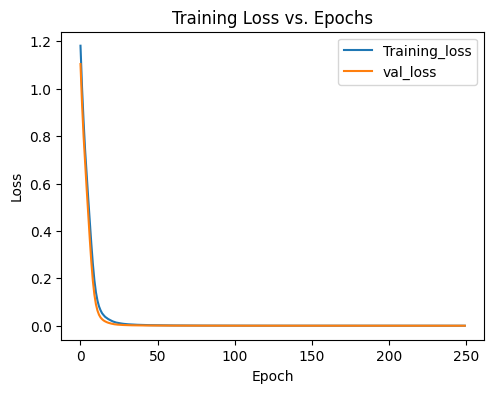

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(neural_mod.history['loss'], label='Training_loss')
plt.plot(neural_mod.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs')
plt.legend()


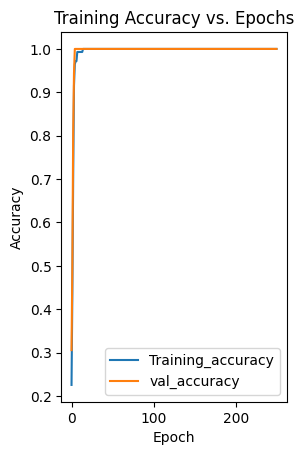

In [14]:

plt.subplot(1, 2, 2)
plt.plot(neural_mod.history['accuracy'], label='Training_accuracy')
plt.plot(neural_mod.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.legend()

plt.show()
